# Set Up

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# atur seed global untuk reproduksibilitas
torch.manual_seed(42)
# seed untuk GPU
torch.cuda.manual_seed(42)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset

## Import Data

In [11]:
data = pd.read_csv(r"D:\Willy's Project\Project\VAE LSTM Anomaly Detection\data\ec2_cpu_utilization_24ae8d.csv")

# ambil 1 kolom sebagai fiture
data = data.drop(columns=['timestamp'])
data

,value
0,0.132
1,0.134
2,0.134
3,0.134
4,0.134
...,...
4027,0.132
4028,0.134
4029,0.134
4030,0.134


In [14]:
# bagi dataset menjadi train dan test
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

train_data = data[:train_size]
test_data = data[train_size:]

# lihat ukuran data train dan test
print(f"Train data size: {train_data.shape}")
print(f"Test data size: {test_data.shape}")

Train data size: (3225, 1)
Test data size: (807, 1)


## Visualisasi Data

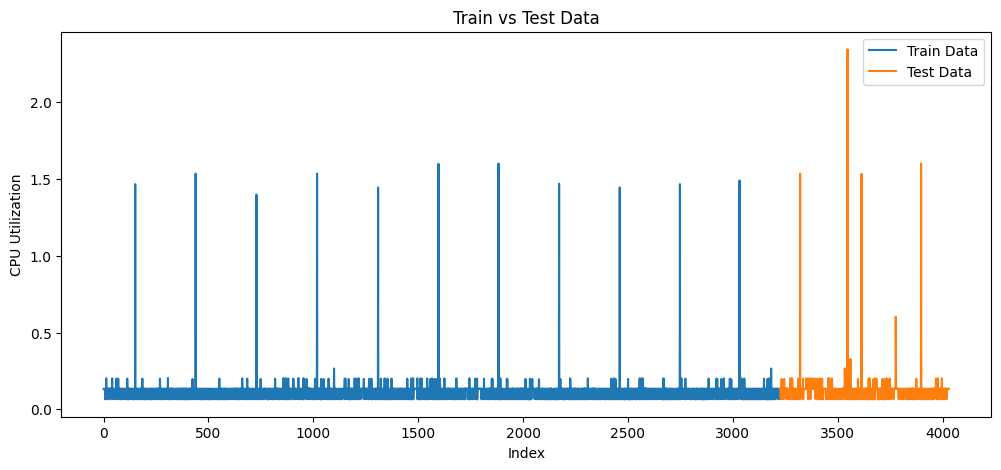

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train_data, label='Train Data')
plt.plot(range(len(train_data), len(train_data)+len(test_data)), test_data, label='Test Data')
plt.xlabel('Index')
plt.ylabel('CPU Utilization')
plt.title('Train vs Test Data')
plt.legend()
plt.show()

## Dataset and  DataLoader

In [12]:
# kelas dataset
class CPUDataset(Dataset):
    def __init__(self, data, seq_length=1):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length
    
    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_length]
        return x.unsqueeze(1)

In [16]:
train_dataset = CPUDataset(train_data.values, seq_length=1)
test_dataset = CPUDataset(test_data.values, seq_length=1)

In [17]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model

In [ ]:
class VAELSTM(nn.Module):
    def __init__(self, input_dim = 1, hidden_dim = 32, latent_dim = 16):
        super(VAELSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.laten_dim = latent_dim

        # encoder
        self.encoder = nn.LSTM(input_dim, hidden_dim, batch_first=True)

        # latent 
        self.hidden_to_mu = nn.Linear(hidden_dim, latent_dim)
        self.hidden_to_logvar = nn.Linear(hidden_dim, latent_dim)

        self.latent_to_hidden = nn.Linear(latent_dim, hidden_dim)

        # decoder
        self.decoder = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.output = nn.Linear(hidden_dim, input_dim)

        def encode(self, x)
            _, (h, _) = self.encoder(x)
            h = h[-1]
            mu = self.hidden_to_mu(h)
            logvar = self.hidden_to_logvar(h)
            return mu, logvar
